# Data Augmentation



A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
This is where the **Data Augmentation** technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:



* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
* Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

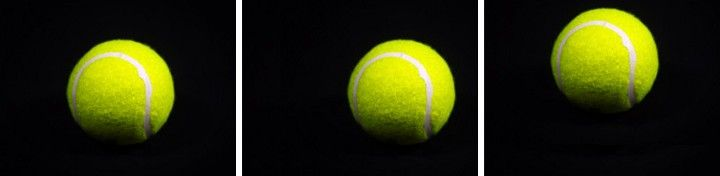


The same ball with some translations



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise








The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments **width_shift_range** and **height_shift_range**.
* Flip the image using the **horizontal_flip** and **vertical_flip** arguments.
* Rotations of images through the argument **rotation_range**
* Image brightness using the **brightness_range** argument.
* Image zoom using the **zoom_range** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.

#Extra information from Keras documentation
**Arguments**
* **rescale**:  rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
* **preprocessing_function**:The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape. 
* **dataframe**: Pandas dataframe containing the filepaths relative to directory, of the images in a string column. It should include other column/s depending on the class_mode
* **weight_col**: string, column in dataframe that contains the sample weights. 
* **target_size**: tuple of integers (height, width)default: (256, 256). The dimensions to which all images found will be resized.
* **color_mode**: one of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1 or 3 color channels.


In [10]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


First we upload an image from the internet


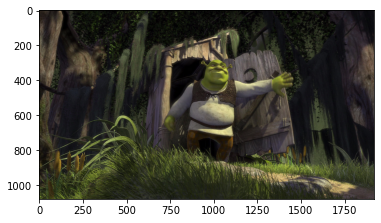

In [26]:
url = 'https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fvignette3.wikia.nocookie.net%2Fp__%2Fimages%2F1%2F11%2FShrek_exits_his_outhouse.jpg%2Frevision%2Flatest%3Fcb%3D20151126003346%26path-prefix%3Dprotagonist&f=1&nofb=1' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


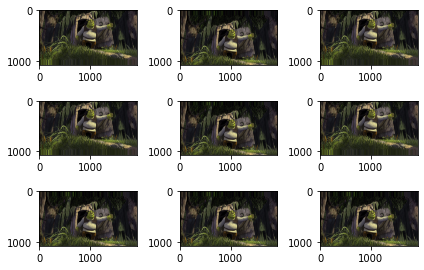

In [27]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the **ImageDataGenerator** class.

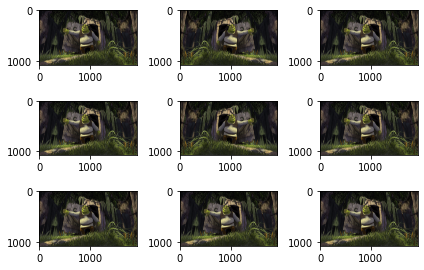

In [28]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

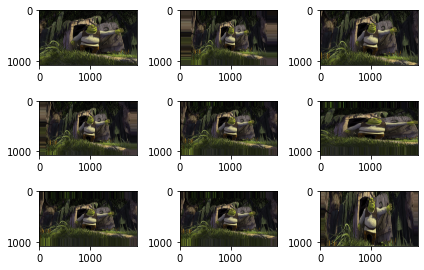

In [29]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

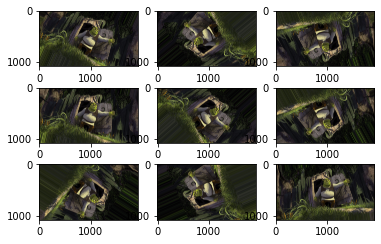

In [30]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

La combinacion de estas tecnicas nos permite aumentar la cantidad de datos del dataset a utilizar, en muchos trabajos se utiliza una aumentacion de datos para aumentar la cantidad de imagenes de entrenamiento y mejorar la precision del trabajo.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

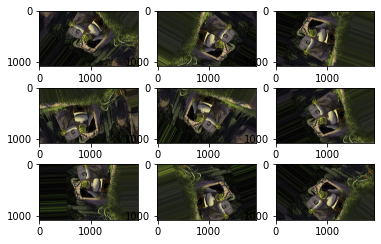

In [31]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [24]:
!pip install textattack

     |████████████████████████████████| 327kB 8.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 3.0MB 14.6MB/s 
     |████████████████████████████████| 1.1MB 39.0MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 778kB 53.4MB/s 
     |████████████████████████████████| 235kB 53.0MB/s 
     |████████████████████████████████| 317kB 38.6MB/s 
     |████████████████████████████████| 153kB 50.6MB/s 
     |████████████████████████████████| 686kB 54.2MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 245kB 56.2MB/s 
     |████████████████████████████████| 1.7MB 49.0MB/s 
     |████████████████████████████████| 890kB 49.3MB/s 
     |████████████████████████████████| 1.1MB 46.1MB/s 
     |████████████████████████████████| 17.3MB 195kB/s 
     |████████████████████████████████| 245kB 58.7MB/s 
     |████████████████████████████████| 204kB 50.7MB/

In [33]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [34]:
text = "Tell me why,Ain't nothin' but a heartache,Tell me why,Ain't nothin' but a mistake,Tell me why,I never wanna hear you say,I want it that way "

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [35]:
aug = WordNetAugmenter();
aug.augment(text)

["Tell me why,Ain't nothin' but a heartache,Tell me why,Ain't nothin' but a mistake,Tell me why,single never wanna hear you enunciate,1 want it that way "]


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [36]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:16<00:00, 29.5MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpk1mj4yep.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


["Tell me why,Ain't nothin' but a heartache,Tell me why,Ain't nothin' but a wrong,Telling me why,I never wanna hear you say,I desiring it that way "]

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [37]:
aug = CharSwapAugmenter()
aug.augment(text)

["Tell me why,Ain't nothin' but a heartache,Tell me why,Ai't nothin' but a mistake,uell me why,I never wanna heBr you say,I want it that way "]


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [38]:
aug = EasyDataAugmenter()
aug.augment(text)

["Tell me why,Ain't nothin' but a heartache, me why,Ain't nothin' but a mistake,Tell me why,I never wanna hear,I want it that way ",
 "Tell me why amp,Ain't nothin' but a heartache,Tell agency me why,Ain't nothin' but a mistake,Tell me why,I never wanna hear you say,I want it merely that way ",
 "narrate me why,Ain't nothin' but a heartache,say me why,Ain't nothin' but a mistake,Tell me why,I ne'er wanna hear you say,I want it that way ",
 "Tell I why,Ain't nothin' but a me,Tell me why,Ain't nothin' but a mistake,Tell heartache why,I never wanna way you say,me want it that hear "]

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1. **src**: source language. this parameter is optional as ** googletrans ** will detect it.
2. **dest**: target language. Mandatory parameter.

1. **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


#Some examples of languages:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [39]:
!pip install googletrans

     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 972kB 15.4MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=589478c8253068a6ab46c59cf5621a5c173272355fb81524f658ca644fd31401
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6159959e5a5cb3f4cac53a7bbaff8f38d812d63197aa52c95ccd093c0778142c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [40]:
from googletrans import Translator
translator = Translator()

In [45]:
origin_text = "Tell me why, I never wanna hear you say, I want it that way"
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='eo').text
print(origin_text)
print(text_trans)
print(final)

Tell me why, I never wanna hear you say, I want it that way
Dime por qué, nunca quiero escucharte decir, lo quiero de esa manera
Diru al mi kial, mi neniam volas aŭdi vin diri, mi volas tiel
